## Import the require libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("C:\\Users\\ahap0\\Downloads\\Tesla Stock Price (2010 to 2023).csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.1+ KB


In [6]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [7]:
data.shape

(3162, 7)

In [8]:
data.drop('Adj Close',axis=1,inplace=True)

In [9]:
df=data.head(5)

In [10]:
df

,Date,Open,High,Low,Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,103003500


C:\Users\ahap0\AppData\Local\Temp\ipykernel_13476\760367119.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


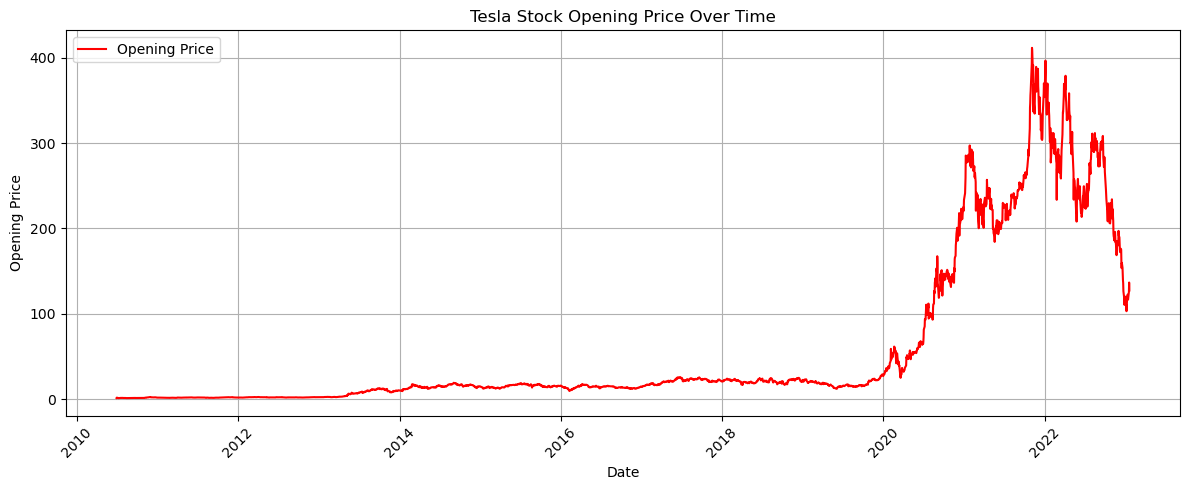

In [11]:

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the opening price of Tesla stock with date on the x-axis
plt.figure(figsize=(12, 5), facecolor='white')
plt.plot(data['Date'], data['Open'], color='r', label='Opening Price')
plt.title('Tesla Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

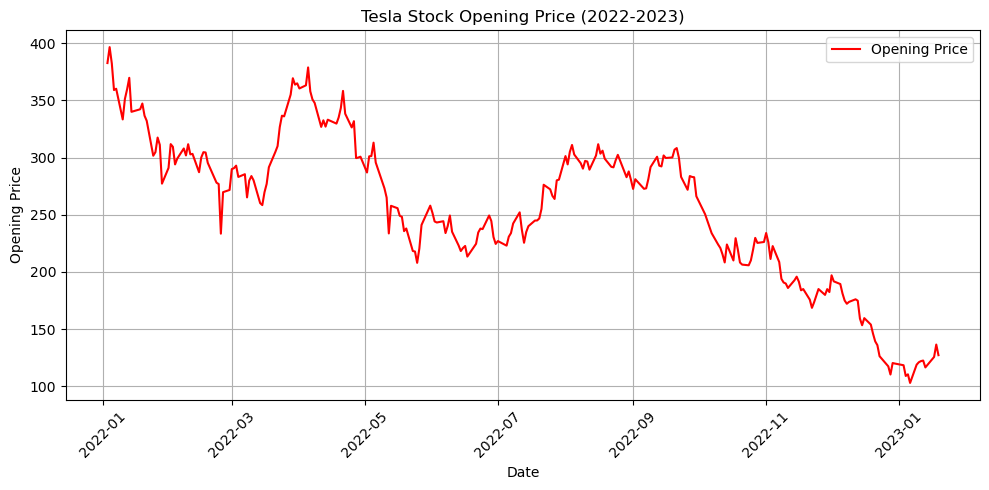

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for the years 2022 to 2023
filtered_data = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2023-12-31')]

# Plot the closing price of Tesla stock for 2022-2023
plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(filtered_data['Date'], filtered_data['Open'], color='r', label='Opening Price')
plt.title('Tesla Stock Opening Price (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

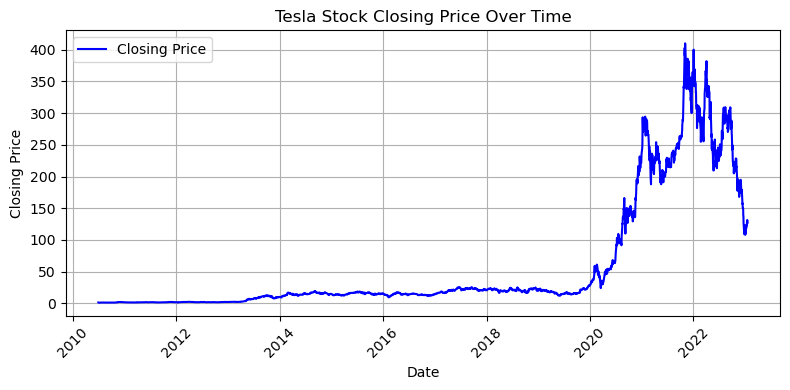

In [13]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the opening price of Tesla stock with date on the x-axis
plt.figure(figsize=(8, 4), facecolor='white')
plt.plot(data['Date'], data['Close'], color='b', label='Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

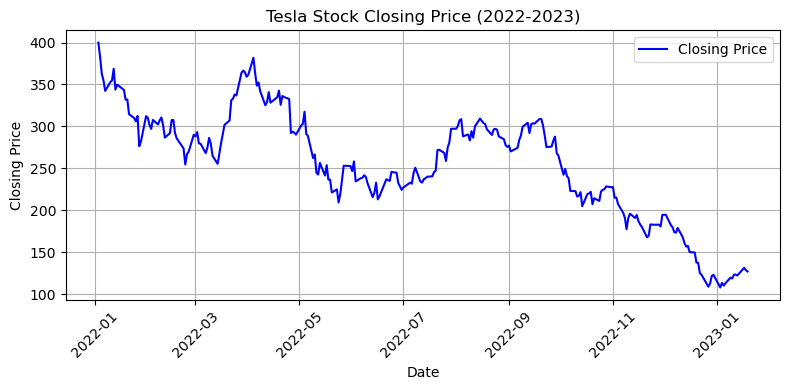

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for the years 2022 to 2023
filtered_data = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2023-12-31')]

# Plot the closing price of Tesla stock for 2022-2023
plt.figure(figsize=(8, 4), facecolor='white')
plt.plot(filtered_data['Date'], filtered_data['Close'], color='b', label='Closing Price')
plt.title('Tesla Stock Closing Price (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

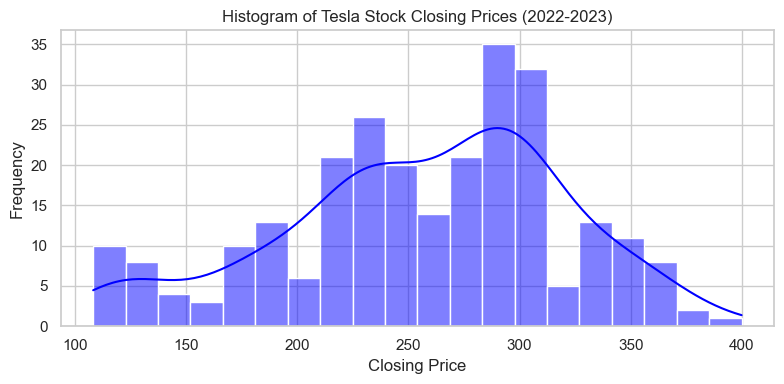

In [15]:


# Assuming data['Date'] is already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for the years 2022 to 2023
filtered_data = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2023-12-31')]

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting a histogram for closing prices of Tesla stock for 2022-2023
plt.figure(figsize=(8, 4))
sns.histplot(data=filtered_data, x='Close', bins=20, color='blue', kde=True)
plt.title('Histogram of Tesla Stock Closing Prices (2022-2023)')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


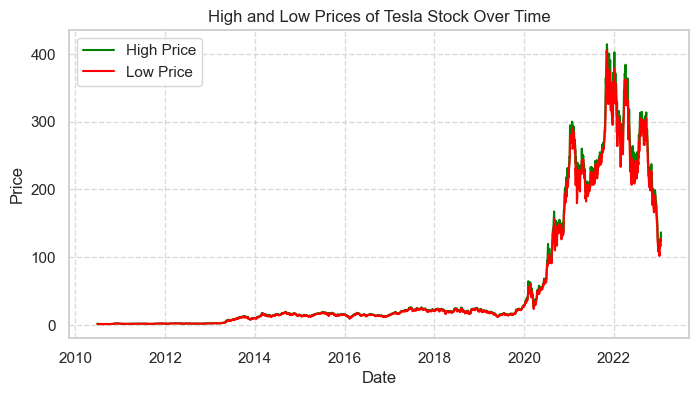

In [16]:
# Assuming 'df' is your dataframe with 'Date', 'High', and 'Low' columns
plt.figure(figsize=(8, 4), facecolor='white')
plt.plot(data['Date'], data['High'], color='green', label='High Price')
plt.plot(data['Date'], data['Low'], color='red', label='Low Price')
plt.title('High and Low Prices of Tesla Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

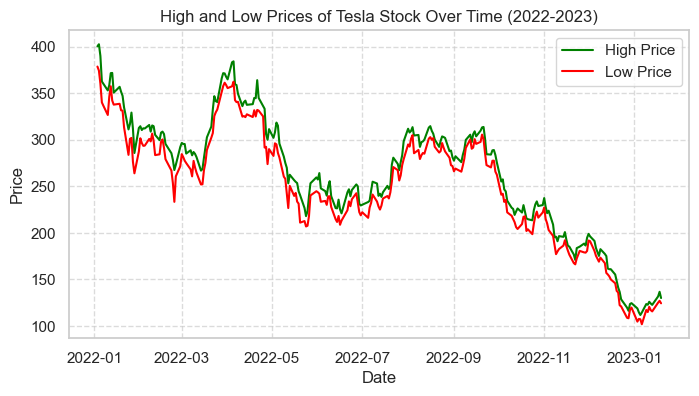

In [17]:
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the year 2022-2023
filtered_data = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2023-12-31')]

# Plotting the filtered data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4), facecolor='white')
plt.plot(filtered_data['Date'], filtered_data['High'], color='green', label='High Price')
plt.plot(filtered_data['Date'], filtered_data['Low'], color='red', label='Low Price')
plt.title('High and Low Prices of Tesla Stock Over Time (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

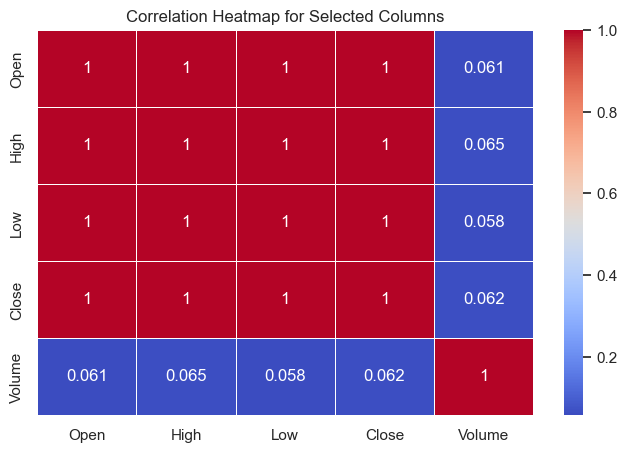

In [18]:
# Select the subset of columns you want to include in the heatmap
columns_to_include = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create a heatmap for the selected columns
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(data[columns_to_include].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

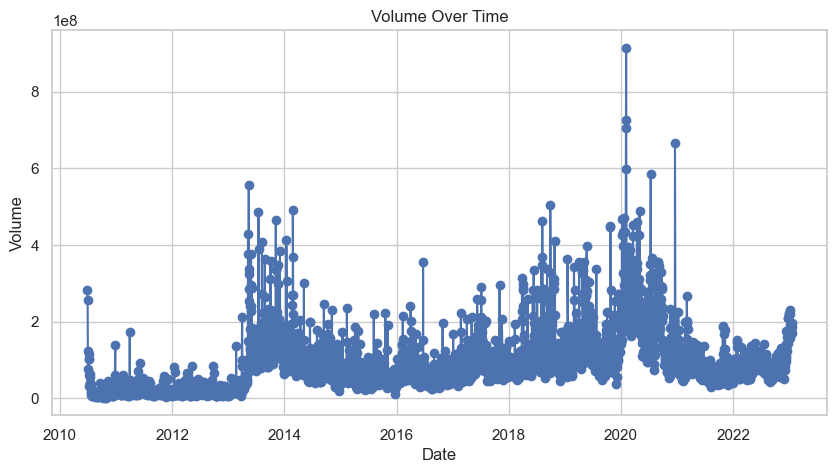

In [19]:
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the volume column
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Volume'], marker='o', linestyle='-')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

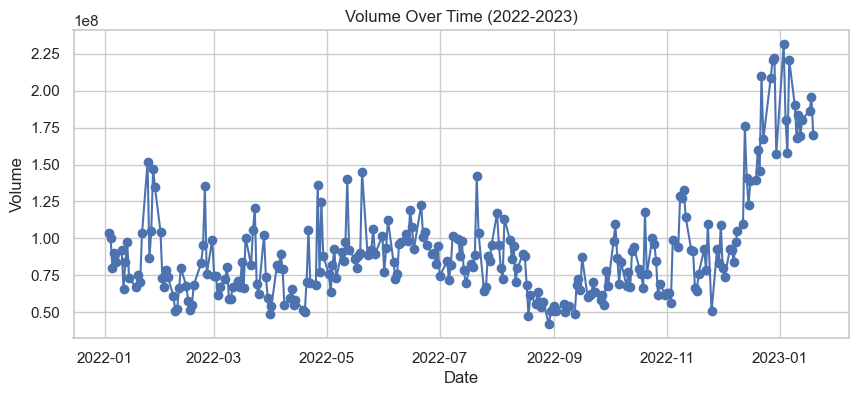

In [20]:
import matplotlib.pyplot as plt

# Filter the data for the years 2022 to 2023
filtered_data = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2023-12-31')]

# Plotting the volume column for the year 2022-2023
plt.figure(figsize=(10, 4))
plt.plot(filtered_data['Date'], filtered_data['Volume'], marker='o', linestyle='-')
plt.title('Volume Over Time (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


## Seperate the input and output columns

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X = data[['High', 'Low', 'Open', 'Volume']].values
y = data['Close'].values

# Perform feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['High', 'Low', 'Open', 'Volume'])

# Store the scaled features back into the original DataFrame
data[['High', 'Low', 'Open', 'Volume']] = X_scaled_df

# Check the first few rows of the DataFrame with scaled features
print(data.head())


        Date      Open      High       Low     Close    Volume
0 2010-06-29  0.000465  0.001350  0.000422  1.592667  0.306605
1 2010-06-30  0.001568  0.002224  0.001371  1.588667  0.280640
2 2010-07-01  0.001439  0.001498  0.000871  1.464000  0.133184
3 2010-07-02  0.001114  0.001043  0.000614  1.280000  0.082560
4 2010-07-06  0.000627  0.000543  0.000140  1.074000  0.110956


## Split the test and train data

In [22]:
X_train,X_test ,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)

## Linear regression  model

In [23]:
# Initializing the linear regression model
model = LinearRegression()

## Fitting the model

In [24]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print(model.coef_)


[ 8.78857495e-01  8.27257156e-01 -7.06586368e-01  4.53063587e-10]


In [26]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
model.score(X_train,y_train)

0.9997267065120674

In [27]:
# Evaluate the model on the test data
test_r_squared = model.score(X_test, y_test)
print("Test R-squared:", test_r_squared)

Test R-squared: 0.9996997062178906


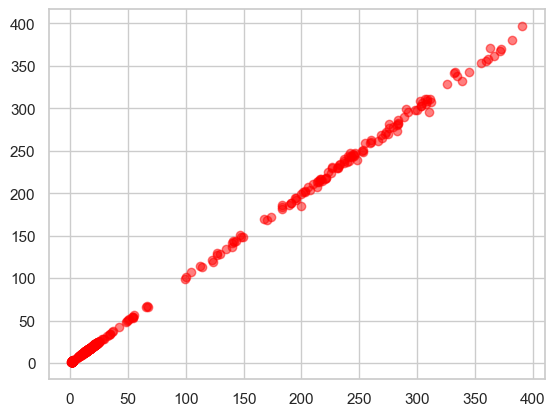

In [28]:
# Assuming you've trained a machine learning model called 'model' and have a test set 'X_test'
# Make predictions using the model
predictions = model.predict(X_test)
#print('The model score is:', model.score(X,y))
# Now, you can use 'predictions' in your code
#plt.scatter(y_test, predictions, color='red', alpha=0.5, label='Predicted')
plt.scatter(y_test, predictions, color='red', alpha=0.5, label='Predicted')

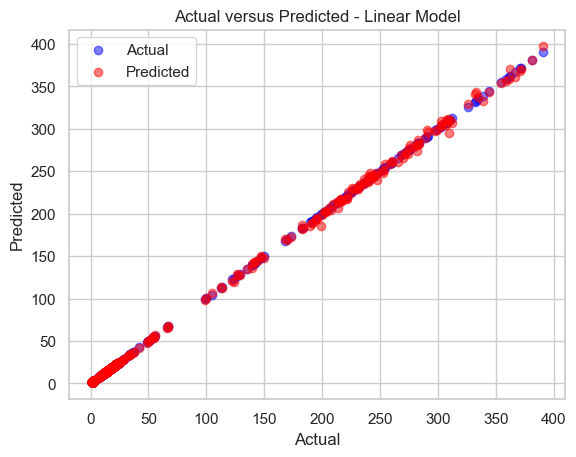

In [29]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

# Extracting the target column from y_test if needed
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    y_test = y_test['Close']  # Assuming 'Close' is the target column name

# Plot scatter plot with actual and predicted data separately
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')

# Ensure predictions have the same length as y_test
predictions = predictions[:len(y_test)]

plt.scatter(y_test, predictions, color='red', alpha=0.5, label='Predicted')

# Set plot title and labels
plt.title('Actual versus Predicted - Linear Model')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.show()


## Run model using Test data

In [30]:
#predict the output(predictions) using the test data
predictions = model.predict(X_test)

## check R squared value

In [31]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9996997062178906

## Compare the actual and predicted values

In [32]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predictions.flatten()}) 
#flatten toget single axis of data (1 dimension only)

In [33]:
dframe.head(15)

,Actual,Predicted
0,16.514000,16.714797
1,2.018667,1.975654
2,21.879999,22.023555
3,2.606667,2.594138
4,6.182000,6.088442
5,22.962000,23.116960
6,366.523346,361.529147
7,1.626000,1.566689
8,22.422667,22.470590
9,302.446655,308.996548


Text(0, 0.5, 'Closing price')

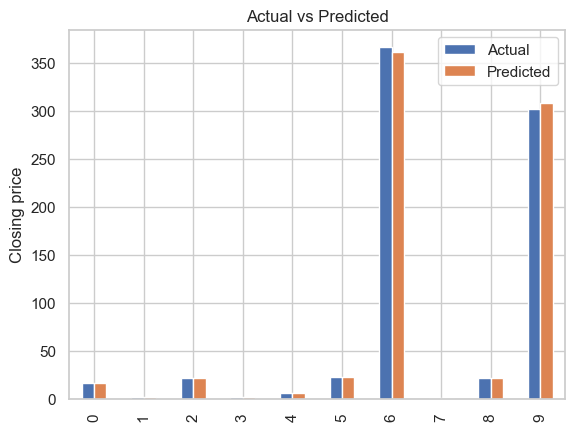

In [34]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

## Metrics to test acuuracy

In [35]:
import math
from sklearn import metrics

In [36]:
#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.6111866115000202
Mean squared value: 2.7503260658365996
root mean squared error value: 1.6584107048124719


## Decision Tree Regressor

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Initialize the Decision Tree Regressor model with hyperparameters
# Adjust hyperparameters such as max_depth, min_samples_split, etc. to prevent overfitting
Dec_Reg_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)


In [39]:
# Train the model on the training data
Dec_Reg_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [40]:
# Make predictions on the training and test data
train_predictions = Dec_Reg_model.predict(X_train)
test_predictions = Dec_Reg_model.predict(X_test)

## Evaluate the model performance

In [41]:
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)


In [42]:
print("Training Mean Absolute Error:", train_mae)
print("Training Mean Squared Error:", train_mse)
print("Training Root Mean Squared Error:", train_rmse)
print("Training R-squared Score:", train_r2)

Training Mean Absolute Error: 1.634250349428269
Training Mean Squared Error: 8.261497042797249
Training Root Mean Squared Error: 2.8742820047443587
Training R-squared Score: 0.9990909359578587


In [43]:
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

In [44]:
print("Test Mean Absolute Error:", test_mae)
print("Test Mean Squared Error:", test_mse)
print("Test Root Mean Squared Error:", test_rmse)
print("Test R-squared Score:", test_r2)

Test Mean Absolute Error: 1.7175633295363226
Test Mean Squared Error: 10.471230339323327
Test Root Mean Squared Error: 3.2359280491573554
Test R-squared Score: 0.9988567008832178


In [45]:
# Assuming your model is called Dec_Reg_model
training_accuracy_percentage = Dec_Reg_model.score(X_train, y_train) * 100
print("Training Accuracy (%):", training_accuracy_percentage)

Training Accuracy (%): 99.90909359578588


In [46]:
# Make predictions
y_pred = Dec_Reg_model.predict(X_test)

In [47]:
test_score = Dec_Reg_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.9988567008832178


In [48]:
# Make predictions
y_pred = Dec_Reg_model.predict(X_test)

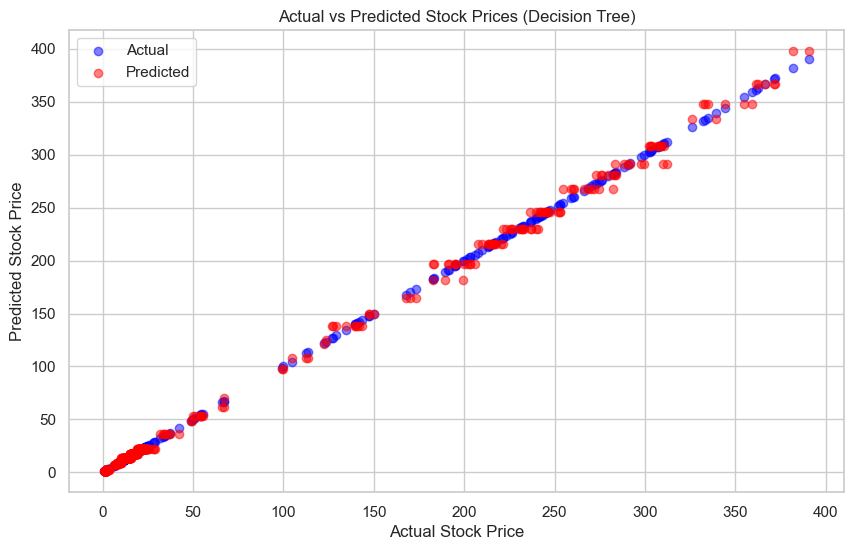

In [49]:
# Plot scatter graph with different colors for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')  # Actual values in blue
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')  # Predicted values in red
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices (Decision Tree)')
plt.legend()
plt.show()

In [50]:
import pickle

# Save the trained model to a file
try:
    with open('stock_price_prediction_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Model saved successfully.")
except Exception as e:
    print("Error occurred while saving the model:", e)


Model saved successfully.


In [51]:
import pandas as pd
import pickle

# Load the pre-trained model from the file
with open('stock_price_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Assume the latest available data point is the last row in the DataFrame
latest_data_point = df.iloc[-1]

# Extracting the latest feature values
latest_high = latest_data_point['High']
latest_low = latest_data_point['Low']
latest_open = latest_data_point['Open']
latest_volume = latest_data_point['Volume']



# Defining X_new with the latest feature values (excluding Date)
X_new = pd.DataFrame({
    'High': [96587],
    'Low': [789557],
    'Open': [90045],
    'Volume': [23434968567]
})

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Print the predicted stock price along with the latest date
print("Predicted Close Price for",  ":", predictions[0])


Predicted Close Price for : 674438.9074819875


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
